In [34]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the one-hot-encoded data
movie_by_genre = pd.read_csv("movie_by_genre_onehot.csv")

### Popular words by genre -- Movie Title

In [3]:
# apply bag-of-words to movie titles
# eliminate common stop words
vectorizer = CountVectorizer(stop_words='english')

# apply to movie titles
corpus = movie_by_genre['title'].values
title_counts = vectorizer.fit_transform(corpus)
# convert to array
title_counts = title_counts.toarray()

# word list
title_words = vectorizer.get_feature_names()
title_words = np.asarray(title_words)

In [4]:
# total times by words
counts_by_word = np.sum(title_counts, axis = 0)

# sort from higher to lower counts
sort_index = np.argsort(counts_by_word) # ascending order
sort_index = sort_index[::-1] # descending order

# match the count data to words
pop_words = pd.DataFrame({"word": title_words[sort_index],
                          "count": counts_by_word[sort_index]})

In [5]:
pop_words.head(n = 10)

,count,word
0,8,potter
1,8,harry
2,5,mystery
3,5,murder
4,4,wars
5,4,rock
6,4,age
7,4,baked
8,3,dead
9,3,dawn


#### Popular words by genre

In [6]:
# read the genre list
genre_names = pd.read_csv("genre_list.csv")

# find the most popular n words for each genre
n = 3 # find 3 words
words_by_genre = list() #store words for each genre

for genre in genre_names['GenreName']:
    # count movies in this genre
    counts_by_genre = np.sum(title_counts[movie_by_genre[genre].values == 1, :], axis = 0)

    # sort from higher to lower counts
    sort_genre = np.argsort(counts_by_genre) # ascending order
    sort_genre = sort_genre[::-1] # descending order

    # return the words of top n words
    words = ", ".join(title_words[sort_genre[:n]])
    words_by_genre.append(words)

In [7]:
pop_word_genre = pd.DataFrame({
        "Genre": genre_names['GenreName'],
        "Popular words": words_by_genre
    })

In [8]:
pop_word_genre

,Genre,Popular words
0,Action,"dawn, wars, men"
1,Adventure,"harry, potter, men"
2,Animation,"ice, age, finding"
3,Comedy,"rock, mutant, la"
4,Crime,"knight, dark, return"
5,Documentary,"brick, love, reverie"
6,Drama,"girl, king, knight"
7,Family,"harry, potter, ice"
8,Fantasy,"potter, harry, men"
9,History,"king, time, ridge"


### Popularity, average votes for each genre

In [70]:
### compute average popularity and vote for each genre
num_genre = genre_names.shape[0]

# lists to store the results
popularity_genre = list()   # average popularity
popularity_se = list()    # standard error of popularity
vote_genre = list()   # average vote
vote_se = list()     # standard error of average vote

# for each genre
for genre in genre_names['GenreName']:
    # movies in this genre
    movie_genre = movie_by_genre.iloc[movie_by_genre[genre].values == 1]

    # commpute average popularity
    popularity_genre.append(movie_genre['popularity'].mean())
    # standard error of popularity
    popularity_se.append(movie_genre['popularity'].std()/np.sqrt(len(movie_genre['popularity'])))
    
    # commpute average vote
    vote_genre.append(movie_genre['vote_average'].mean())
    # standard error of average vote
    vote_se.append(movie_genre['vote_average'].std()/np.sqrt(len(movie_genre['vote_average'])))

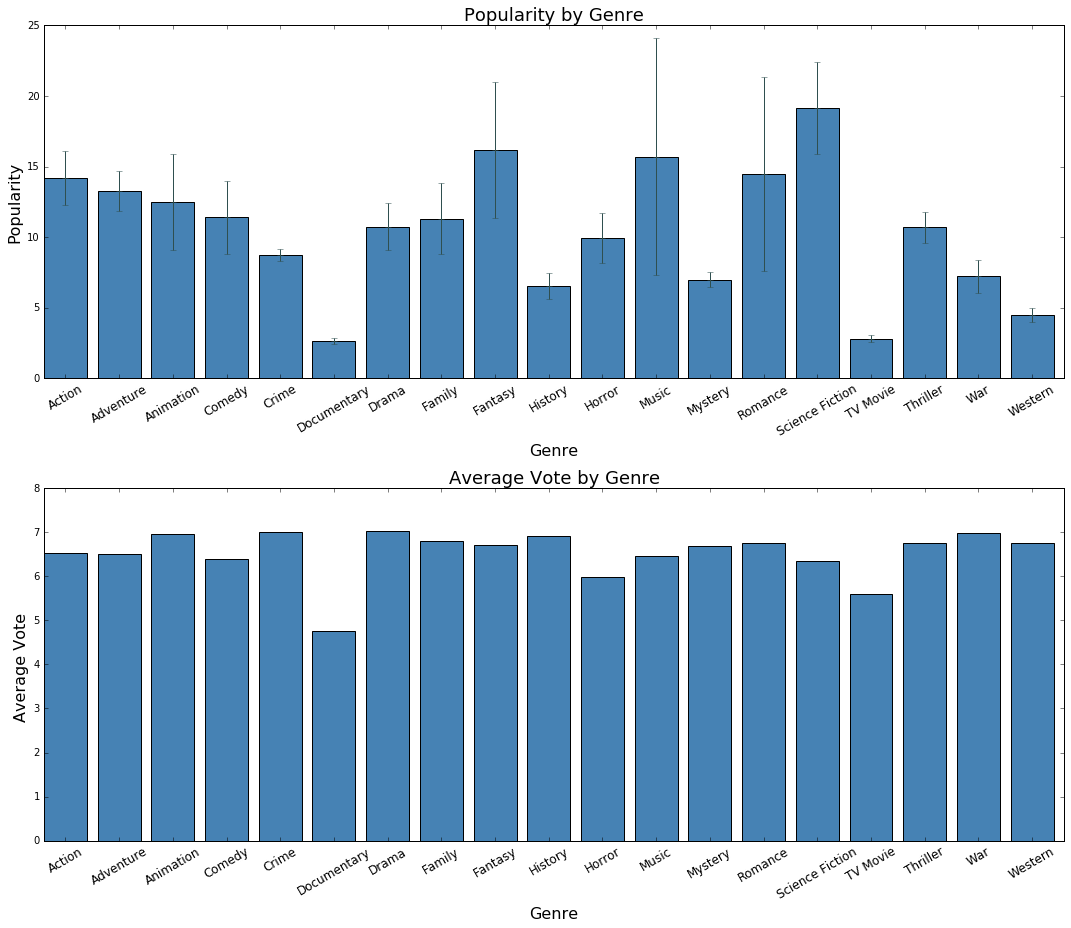

In [112]:
# generate the bar plots
fig = plt.figure(figsize = (15, 13))

# create the locations of the bars
bar = np.arange(num_genre)
bar_width = 0.8
tickers = [i + 0.5*(bar_width) for i in bar] 

# add subplot of average popularity
ax1 = fig.add_subplot(211)
ax1.bar(bar, popularity_genre, color = "steelblue")
plt.errorbar(tickers, popularity_genre, yerr=popularity_se, fmt = '_', color = "darkslategray")

plt.xticks(tickers, genre_names['GenreName'], rotation = 30, fontsize = 12)
ax1.set_title("Popularity by Genre", fontsize = 18)
ax1.set_xlabel("Genre", fontsize = 16)
ax1.set_ylabel("Popularity", fontsize = 16)
ax1.set_xlim([0, 19])

# add subplot of average vote
ax2 = fig.add_subplot(212)
ax2.bar(bar, vote_genre, color = "steelblue")
# large error bar, not included
#plt.errorbar(tickers,  vote_genre, yerr=vote_se, fmt = '_')

plt.xticks(tickers, genre_names['GenreName'], rotation = 30, fontsize = 12)
ax2.set_title("Average Vote by Genre", fontsize = 18)
ax2.set_xlabel("Genre", fontsize = 16)
ax2.set_ylabel("Average Vote ", fontsize = 16)
ax2.set_xlim([0, 19])

plt.tight_layout()
plt.show()

### Average title length by genre

In [97]:
### count title length for each movie

# list to store title length by movie
title_length = list()

# count title length for each movie
for title in movie_by_genre['title']:
    title_length.append(len(title.split(" ")))
    
# add title length to the data
movie_by_genre['title_length'] = title_length

In [98]:
### Count average title length and SE for each genre

# lists to store the results
title_genre = list()   # average title length
title_se = list()    # standard error of title length

# for each genre
for genre in genre_names['GenreName']:
    # movies in this genre
    movie_genre = movie_by_genre.iloc[movie_by_genre[genre].values == 1]

    # commpute average title length
    title_genre.append(movie_genre['title_length'].mean())
    # standard error of popularity
    title_se.append(movie_genre['title_length'].std()/np.sqrt(len(movie_genre['title_length'])))

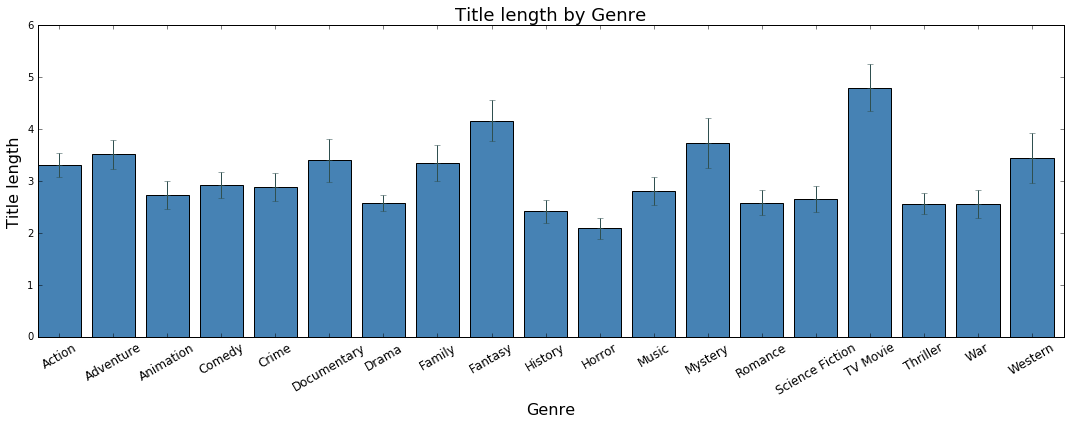

In [113]:
# generate the bar plots
fig = plt.figure(figsize = (15, 6))

# add title length by genre
ax1 = fig.add_subplot(111)
ax1.bar(bar, title_genre, color = "steelblue")
plt.errorbar(tickers, title_genre, yerr=title_se, fmt = '_', color = "darkslategray")

plt.xticks(tickers, genre_names['GenreName'], rotation = 30, fontsize = 12)
ax1.set_title("Title length by Genre", fontsize = 18)
ax1.set_xlabel("Genre", fontsize = 16)
ax1.set_ylabel("Title length", fontsize = 16)
ax1.set_xlim([0, 19])

plt.tight_layout()
plt.show()